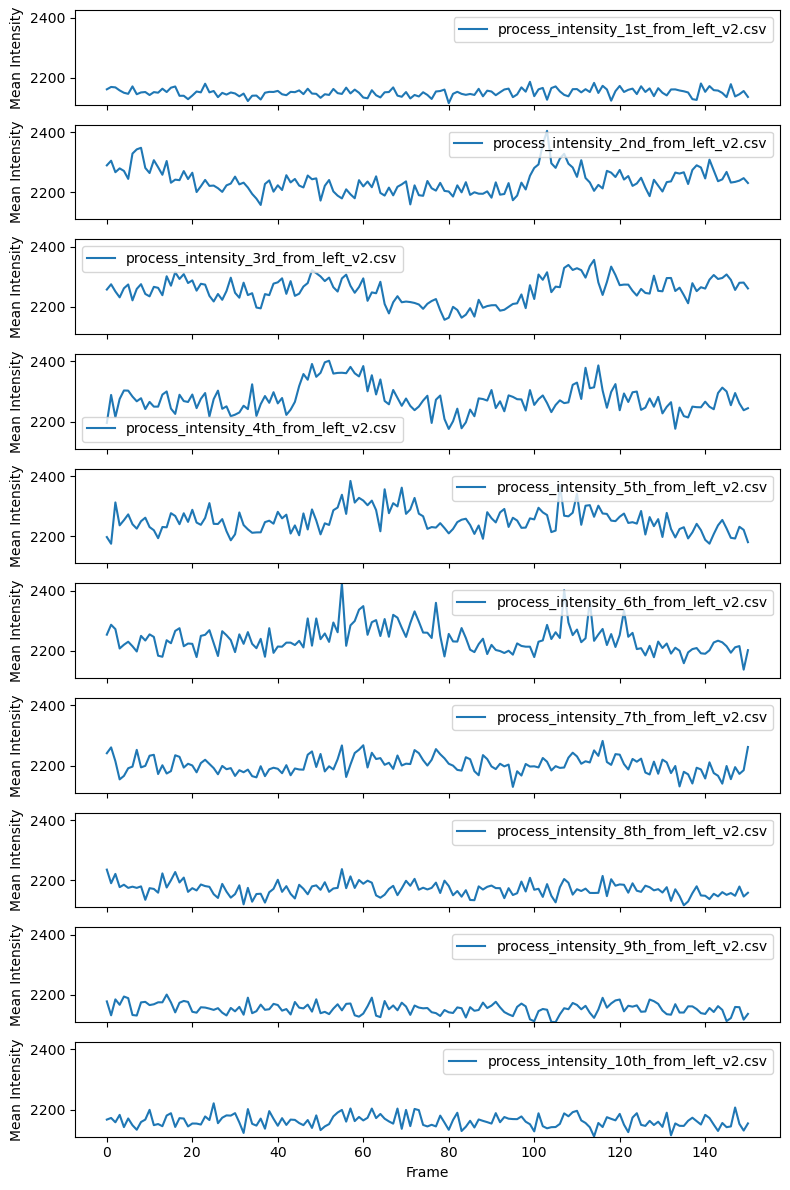

In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def plot_csv_data(directory, file_names):
    # Create figure with 5 subplots
    fig, axes = plt.subplots(len(file_names), 1, figsize=(8, 12), sharex=True)

    # Determine common y-axis range
    y_min, y_max = float('inf'), float('-inf')
    for file in file_names:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        if 'Mean' in df.columns:
            y_min = min(y_min, df['Mean'].min())
            y_max = max(y_max, df['Mean'].max())

    for i, file in enumerate(file_names):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)

        if '[_]' in df.columns and 'Mean' in df.columns:
            axes[i].plot(df['[_]'], df['Mean'], label=file)
            axes[i].set_ylabel('Mean Intensity')
            axes[i].set_ylim(y_min, y_max)
            axes[i].legend()
        else:
            print(f"Skipping {file} as 'Frame' or 'Mean' column is missing.")

    axes[-1].set_xlabel('Frame')
    plt.tight_layout()
    plt.show()

# Example usage
directory = 'E:\\Spandan\\2D_Neurons_Paper\\Glass\\div2\\control_div2_glass_2019_01_23_div2cortex_C1_timelapse1_2secPerTP_5min'  # Replace with your path
file_names = [
    'process_intensity_1st_from_left_v2.csv',
    'process_intensity_2nd_from_left_v2.csv',
    'process_intensity_3rd_from_left_v2.csv',
    'process_intensity_4th_from_left_v2.csv',
    'process_intensity_5th_from_left_v2.csv',
    'process_intensity_6th_from_left_v2.csv',
    'process_intensity_7th_from_left_v2.csv',
    'process_intensity_8th_from_left_v2.csv',
    'process_intensity_9th_from_left_v2.csv',
    'process_intensity_10th_from_left_v2.csv'
]  # Manually enter file names

# file_names = [
#     'process_intensity_3rd_from_left_v2.csv',
#     'process_intensity_4th_from_left_v2.csv',
#     'process_intensity_5th_from_left_v2.csv',
#     'process_intensity_6th_from_left_v2.csv',
#     'process_intensity_7th_from_left_v2.csv',
# ]  

# file_names = [
#     'process_intensity_1st_from_left_v2.csv',
#     'process_intensity_3rd_from_left_v2.csv',
#     'process_intensity_5th_from_left_v2.csv',
#     'process_intensity_7th_from_left_v2.csv',
#     'process_intensity_9th_from_left_v2.csv',
# ]  # Manually enter file names

plot_csv_data(directory, file_names)

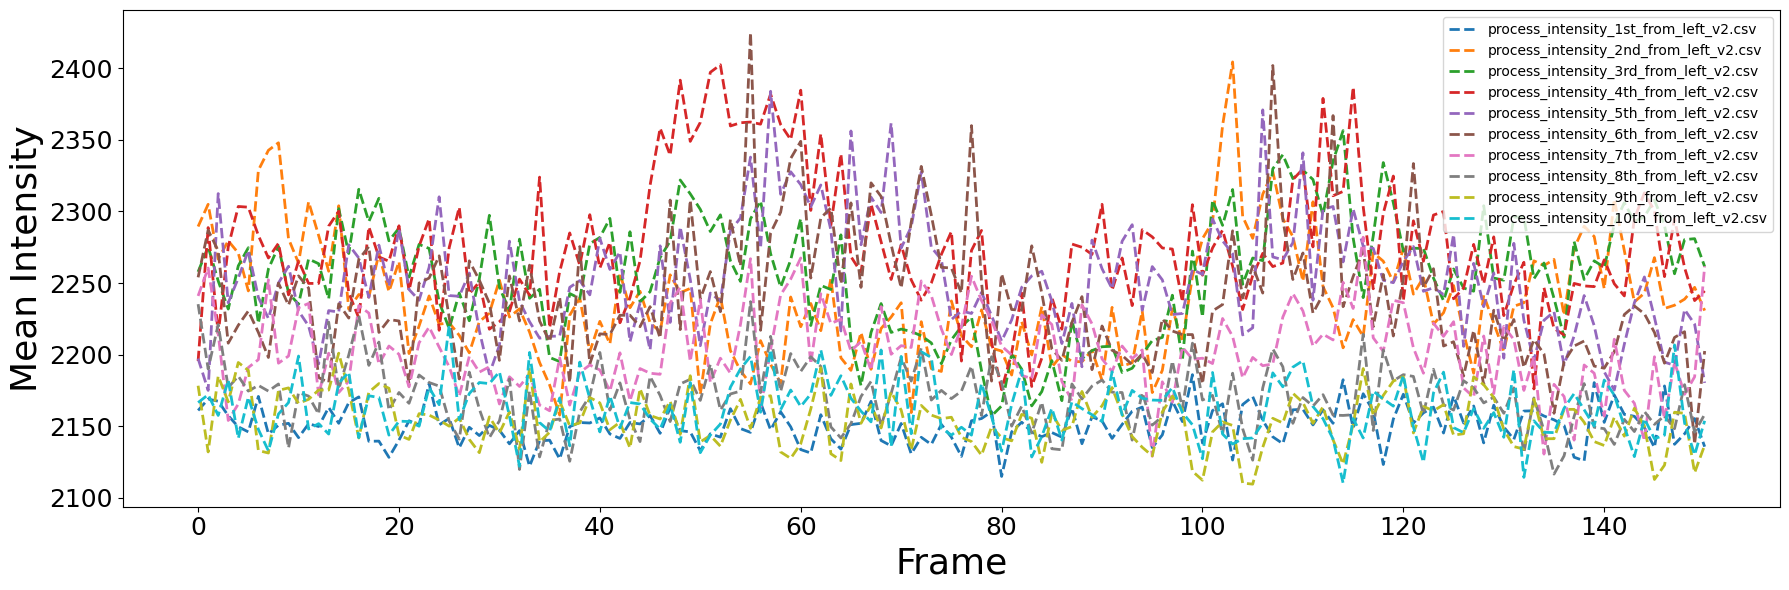

In [87]:
def plot_excel_data(directory, file_names):
    plt.figure(figsize=(18, 6))

    # Plot all data on the same plot
    for file in file_names:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)

        if '[_]' in df.columns and 'Mean' in df.columns:
            
            df['Mean_Smoothed'] = gaussian_filter1d(df['Mean'], sigma=0.01)
            plt.plot(df['[_]'], df['Mean_Smoothed'], '--', linewidth=2, label=file)
        else:
            print(f"Skipping {file} as 'Frame' or 'Mean' column is missing.")

    plt.xlabel('Frame', fontsize=26)
    plt.ylabel('Mean Intensity', fontsize=26)
    plt.tick_params(axis='both', labelsize=18)  # Increase tick size
    # plt.xlim([40,70])
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
plot_excel_data(directory, file_names)


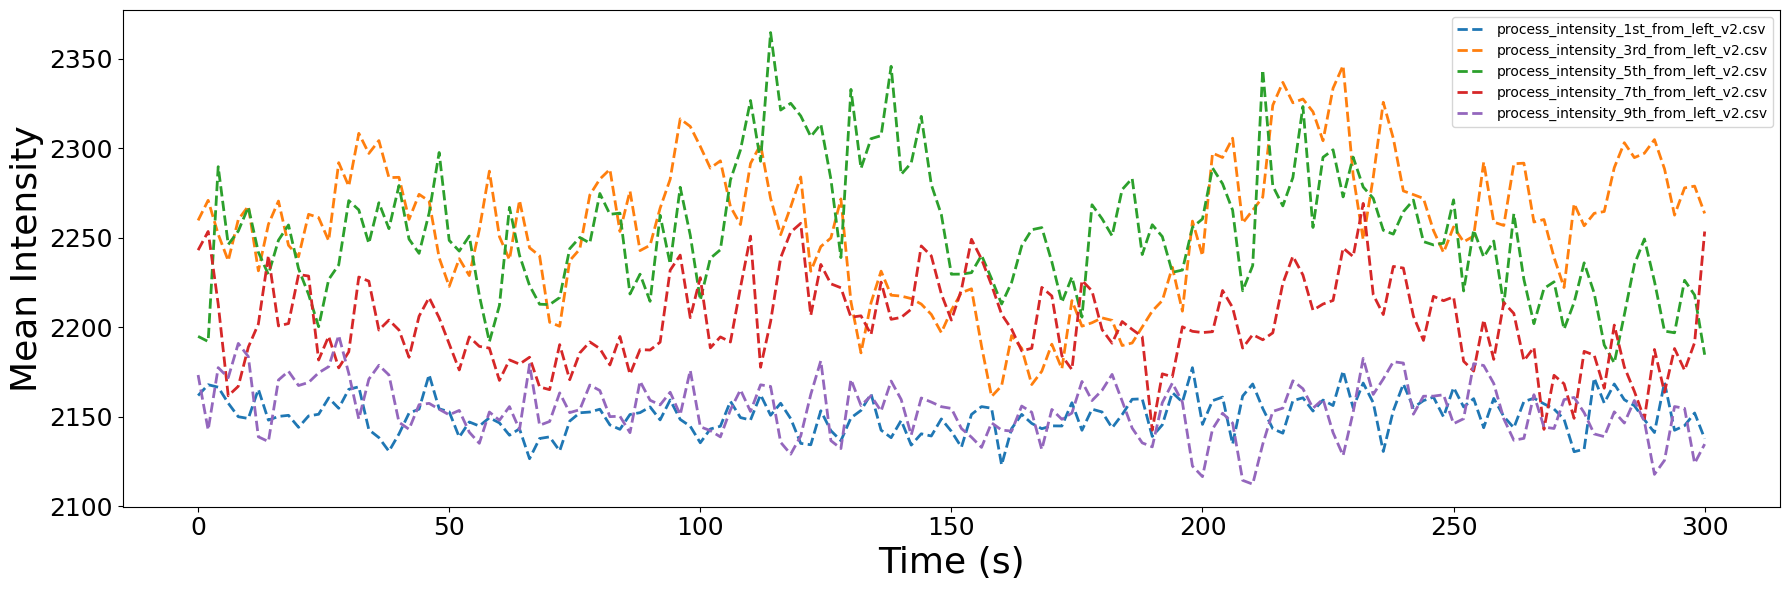

In [84]:
def plot_excel_data(directory, file_names):
    plt.figure(figsize=(18, 6))

    # Plot all data on the same plot
    for file in file_names:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)

        if '[_]' in df.columns and 'Mean' in df.columns:
            # Convert frames to real time (assuming 2s per frame)
            df['Time (s)'] = df['[_]'] * 2  
            
            df['Mean_Smoothed'] = gaussian_filter1d(df['Mean'], sigma=0.5)
            plt.plot(df['Time (s)'], df['Mean_Smoothed'], '--', linewidth=2, label=file)
        else:
            print(f"Skipping {file} as 'Frame' or 'Mean' column is missing.")

    plt.xlabel('Time (s)', fontsize=26)  # Updated x-axis label
    plt.ylabel('Mean Intensity', fontsize=26)
    plt.tick_params(axis='both', labelsize=18)  # Increase tick size
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
plot_excel_data(directory, file_names)
